In [406]:
import pandas as pd


In [407]:
df = pd.read_csv('application_train.csv')

In [408]:
df

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,NaN,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,NaN,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,NaN,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,NaN,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,NaN,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,NaN,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,0,0,0,0,0,0,Services,0
307507,456252,NaN,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,0,0,0,0,0,0,XNA,0
307508,456253,NaN,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,0,0,0,0,1,1,School,0
307509,456254,NaN,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   Unnamed: 1                   0 non-null       float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [410]:
df.shape

(307511, 37)

# Removing Null Values


In [411]:
# checking the null per column

nulls_per_column = df.isnull().sum()

In [412]:
nulls_per_column

SK_ID_CURR                          0
Unnamed: 1                     307511
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  


The three major strategies for dealing with missing values:
Delete rows that have lots of missing data
Delete a column that has lot of missing data
Fill the missing data with a value such as mean or median


In [413]:
#Removing Unnamed , own_car_age since they have more than half of there data missing.

df.drop('Unnamed: 1', axis = 1 , inplace = True)

In [414]:
df.drop('OWN_CAR_AGE', axis = 1, inplace = True)

In [415]:
#df['AMT_GOODS_PRICE']
#df['NAME_TYPE_SUITE']
df['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64

In [416]:
# For column AMT_ANNUITY and AMT_GOODS_PRICE we will the use median of the column and fill the null values with the median.

ann = df['AMT_ANNUITY'].median()
ann

24903.0

In [417]:
df['AMT_ANNUITY'].fillna(ann, inplace = True)

In [418]:
df.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
R

In [419]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace = True)

In [420]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(), inplace = True)

In [421]:
# For the nun numeric column like NAME_TYPE_SUITE and OCCUPATION_TYPE. I am trying the get the most repeated value(mode) 


In [423]:

# in the column and then fill the null that

mod1 = df['NAME_TYPE_SUITE'].value_counts().idxmax()
df['NAME_TYPE_SUITE'].fillna(mod1, inplace = True)

In [424]:
mod2 = df['OCCUPATION_TYPE'].value_counts().idxmax()

In [425]:
df['OCCUPATION_TYPE'].fillna(mod2, inplace = True)

In [426]:
df.isnull().sum()

## All the nulls are gone.

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

# Outliers


In [ ]:
#Picked columns that had numerical value.

DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH,
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
CNT_FAM_MEMBERS
CNT_CHILDREN


In [437]:
columns_to_check = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Calculate Q1, Q3, and IQR for the specified columns
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1


# the outlier condition for each column
outlier_condition = ((df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR)))

filtered_df = df[~outlier_condition.any(axis=1)]


In [438]:
filtered_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,456244,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,1,1,0,1,0,1,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
307503,456247,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,-11870,-399,-675.0,-3936,1,1,0,1,0,1,Core staff,1.0,0,0,0,0,0,0,Bank,0
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,0,0,0,0,0,0,Services,0
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1


In [430]:
df.shape

(307511, 35)

In [431]:
filtered_df.shape

(208292, 35)

# Exploring dataset

In [432]:
filtered_df.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0
5,100008,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,0,0,0,0,0,0,Other,0
9,100012,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,0,0,0,0,0,0,Electricity,0
10,100014,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-10197,-679,-4427.0,-738,1,1,0,1,0,0,Core staff,3.0,0,0,0,0,0,0,Medicine,0
12,100016,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-13439,-2717,-311.0,-3227,1,1,1,1,1,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 2,0
13,100017,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,-14086,-3028,-643.0,-4911,1,1,0,1,0,0,Drivers,3.0,0,0,0,0,0,0,Self-employed,0


### Occupation 

In [439]:
occupation_counts = filtered_df['OCCUPATION_TYPE'].value_counts()
occupation_counts

OCCUPATION_TYPE
Laborers                 80953
Sales staff              29384
Core staff               21428
Drivers                  16069
Managers                 13896
High skill tech staff     8913
Accountants               7705
Medicine staff            6316
Security staff            6106
Cooking staff             5299
Cleaning staff            4210
Private service staff     2244
Low-skill Laborers        1971
Waiters/barmen staff      1232
Secretaries               1062
Realty agents              662
HR staff                   441
IT staff                   401
Name: count, dtype: int64

In [434]:
## From the value counts we can see that most of the client comprise of Laborers and Sales Staff.
# Visualizing this :

import matplotlib.pyplot as plt



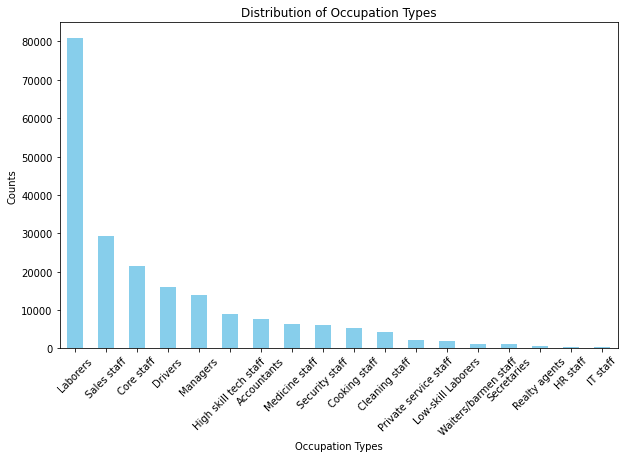

In [440]:
#  bar chart
plt.figure(figsize=(10, 6)) 
occupation_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Occupation Types')
plt.ylabel('Counts')
plt.title('Distribution of Occupation Types')
plt.xticks(rotation=45) 
plt.show()


### Age

In [441]:
filtered_df['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307500   -20390
307503   -11870
307506    -9327
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 208292, dtype: int64

In [442]:
filtered_df = filtered_df.copy()
filtered_df['AGE_YEARS'] = filtered_df['DAYS_BIRTH'] / -365.25
filtered_df['AGE_YEARS'] = filtered_df['AGE_YEARS'].astype(int)

In [443]:
filtered_df['AGE_YEARS'].describe()

count    208292.000000
mean         39.083724
std           9.964200
min          20.000000
25%          31.000000
50%          38.000000
75%          47.000000
max          68.000000
Name: AGE_YEARS, dtype: float64

In [444]:
filtered_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE_YEARS
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1,25
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0,45
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0,52
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,52
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,456244,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,1,1,0,1,0,1,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,55
307503,456247,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,-11870,-399,-675.0,-3936,1,1,0,1,0,1,Core staff,1.0,0,0,0,0,0,0,Bank,0,32
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,0,0,0,0,0,0,Services,0,25
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1,32


In [445]:
filtered_df['agebin'] = pd.cut(filtered_df['AGE_YEARS'],[19,30,40,50,60,70], labels=['20-30','31-40','41-50','51-60','61-70'])


In [446]:
filtered_df['agebin']

0         20-30
1         41-50
2         51-60
3         51-60
4         51-60
          ...  
307500    51-60
307503    31-40
307506    20-30
307509    31-40
307510    41-50
Name: agebin, Length: 208292, dtype: category
Categories (5, object): ['20-30' < '31-40' < '41-50' < '51-60' < '61-70']

In [447]:
agebin_counts = filtered_df['agebin'].value_counts()
agebin_counts 

agebin
31-40    70041
41-50    56498
20-30    49142
51-60    29623
61-70     2988
Name: count, dtype: int64

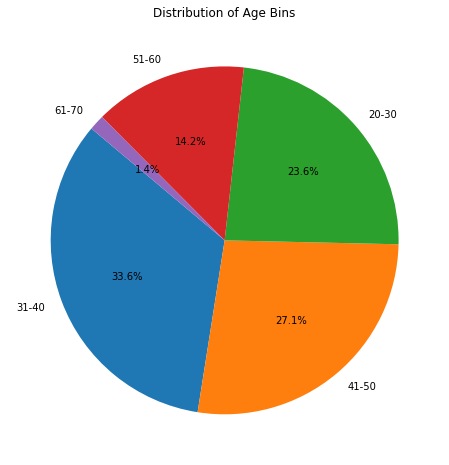

In [448]:
# pie chart to show the distribution of age 
plt.figure(figsize=(8, 8))
plt.pie(agebin_counts, labels=agebin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Bins')
plt.show()


In [449]:
income_summary = filtered_df['AMT_INCOME_TOTAL'].describe()
income_summary 

count    208292.000000
mean     156590.846937
std       62026.446128
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [450]:

filtered_df['income_category'] = pd.cut(filtered_df['AMT_INCOME_TOTAL'], [25600, 90000, 150000, 210000, 270000, 337500],
                               labels=['Low Income', 'Lower Middle Income', 'Middle Income', 'Upper Middle Income', 'High Income'])


In [451]:
incomebin_counts = filtered_df['income_category'].value_counts()
incomebin_counts

income_category
Lower Middle Income    70928
Middle Income          61010
Low Income             35983
Upper Middle Income    31552
High Income             8819
Name: count, dtype: int64

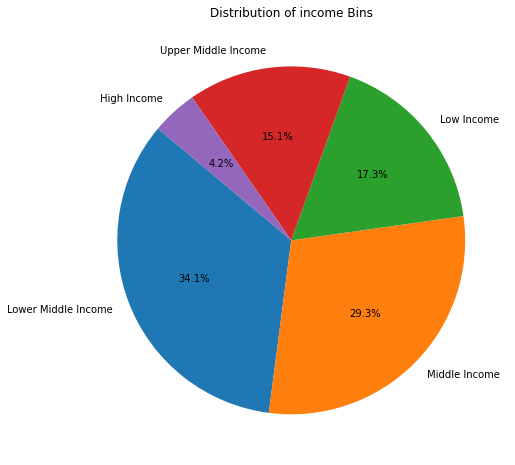

In [452]:
plt.figure(figsize=(8, 8))
plt.pie(incomebin_counts, labels=incomebin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of income Bins')
plt.show()


In [453]:
filtered_df.groupby('OCCUPATION_TYPE')['income_category'].agg(lambda x: x.mode()[0])

OCCUPATION_TYPE
Accountants              Lower Middle Income
Cleaning staff           Lower Middle Income
Cooking staff            Lower Middle Income
Core staff               Lower Middle Income
Drivers                        Middle Income
HR staff                       Middle Income
High skill tech staff    Lower Middle Income
IT staff                       Middle Income
Laborers                 Lower Middle Income
Low-skill Laborers       Lower Middle Income
Managers                       Middle Income
Medicine staff           Lower Middle Income
Private service staff    Lower Middle Income
Realty agents                  Middle Income
Sales staff              Lower Middle Income
Secretaries              Lower Middle Income
Security staff           Lower Middle Income
Waiters/barmen staff     Lower Middle Income
Name: income_category, dtype: object

In [ ]:
## Most of the client from all the occupation are lower middle class or middle class client with the income 
#ranging from 90000-210000


### Organization Type

In [198]:
filtered_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    57366
Self-employed             34237
Other                     13421
Government                 8376
Business Entity Type 2     8187
Medicine                   8140
Trade: type 7              6872
School                     6422
Construction               5672
Kindergarten               5511
Business Entity Type 1     4896
Transport: type 4          4435
Trade: type 3              3181
Security                   2915
Industry: type 3           2875
Industry: type 9           2491
Housing                    2424
Industry: type 11          2193
Bank                       2048
Agriculture                1903
Military                   1845
Postal                     1756
Police                     1673
Trade: type 2              1665
Restaurant                 1647
Transport: type 2          1586
Security Ministries        1471
Services                   1376
Transport: type 3          1083
Industry: type 7           1032
University            

In [454]:
mode_df = filtered_df.groupby('OCCUPATION_TYPE')['ORGANIZATION_TYPE'].agg(lambda x: x.mode()[0]).reset_index()
mode_df

,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Accountants,Business Entity Type 3
1,Cleaning staff,Business Entity Type 3
2,Cooking staff,Business Entity Type 3
3,Core staff,Kindergarten
4,Drivers,Business Entity Type 3
5,HR staff,Business Entity Type 3
6,High skill tech staff,Business Entity Type 3
7,IT staff,Business Entity Type 3
8,Laborers,Business Entity Type 3
9,Low-skill Laborers,Business Entity Type 3


/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr

<Figure size 864x576 with 0 Axes>

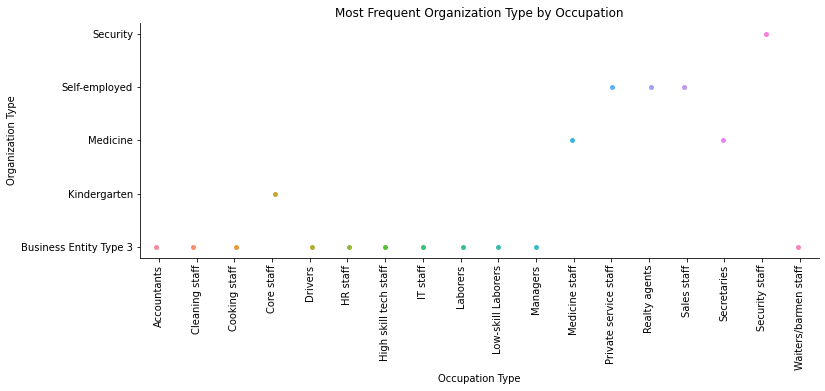

In [455]:
#  categorical plot
plt.figure(figsize=(12, 8))
sns.catplot(x='OCCUPATION_TYPE', y='ORGANIZATION_TYPE', data=mode_df, kind='strip', height=4, aspect=3)
plt.xticks(rotation=90)  
plt.title('Most Frequent Organization Type by Occupation')
plt.xlabel('Occupation Type')
plt.ylabel('Organization Type')
plt.show()

In [ ]:
## Most of the clients are from Organization type Buisness Entity 3

### Type of Loan

In [456]:
filtered_df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [457]:
filtered_df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         185801
Revolving loans     22491
Name: count, dtype: int64

In [458]:
grouped_data = filtered_df.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts().unstack()

In [459]:
import seaborn as sns

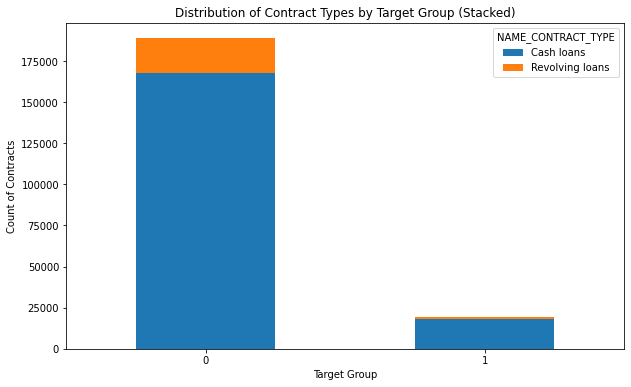

In [460]:
# I am doing two chart two show the loan type and the defaulters late payemnet
#  stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Contract Types by Target Group (Stacked)')
plt.xlabel('Target Group')
plt.ylabel('Count of Contracts')
plt.xticks(rotation=0)
plt.show()

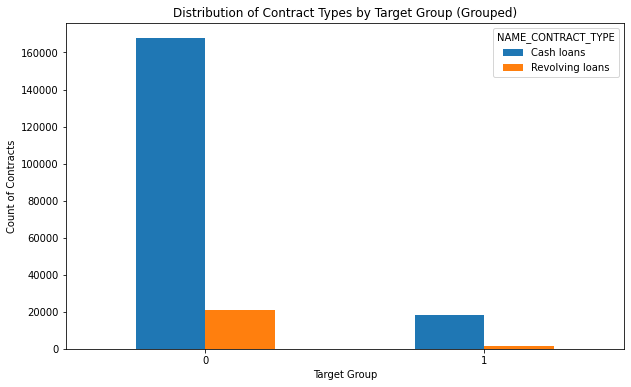

In [461]:
#bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Contract Types by Target Group (Grouped)')
plt.xlabel('Target Group')
plt.ylabel('Count of Contracts')
plt.xticks(rotation=0)
plt.show()

### Credit


In [462]:
total_loans = filtered_df['AMT_CREDIT'].sum()

In [463]:
print(f"Total amount out in loans: {total_loans}")


Total amount out in loans: 111944391673.5


In [464]:
filtered_df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'TARGET', 'AGE_YEARS', 'agebin',
       'income_category'],
      dtype='object')

In [465]:
# Total sum of credit  where the payement is delayed

total_default = filtered_df[filtered_df['TARGET'] == 1]['AMT_CREDIT'].sum()
total_default

10079104239.0

In [466]:
# Total sum of credit where the payement is on time 

total_default = filtered_df[filtered_df['TARGET'] == 0]['AMT_CREDIT'].sum()
total_default

101865287434.5

### Income and Credit

In [468]:
print(filtered_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe())


       AMT_INCOME_TOTAL    AMT_CREDIT
count     208292.000000  2.082920e+05
mean      156590.846937  5.374397e+05
std        62026.446128  3.192770e+05
min        25650.000000  4.500000e+04
25%       112500.000000  2.700000e+05
50%       144000.000000  4.811760e+05
75%       202500.000000  7.551900e+05
max       337500.000000  1.615018e+06


In [469]:
print("Correlation coefficient:", filtered_df['AMT_INCOME_TOTAL'].corr(filtered_df['AMT_CREDIT']))


Correlation coefficient: 0.3164652638250584


### Target

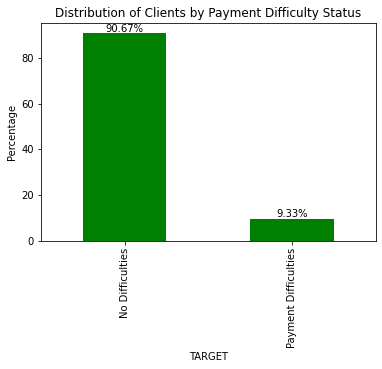

In [216]:

# Calculating the percentage of each category in the 'TARGET' column
value_counts_percent = filtered_df['TARGET'].value_counts(normalize=True) * 100

# Creating a new Series with updated index names for clarity
updated_index = {0: 'No Difficulties', 1: 'Payment Difficulties'}
value_counts_percent = value_counts_percent.rename(index=updated_index)

# Plotting a vertical bar chart
ax = value_counts_percent.plot(kind='bar', color='green')
plt.title('Distribution of Clients by Payment Difficulty Status')
plt.ylabel('Percentage')
plt.xlabel('TARGET')

# Adding labels on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{bar.get_height():.2f}%', 
             ha='center', 
             va='bottom')

plt.show()


### Looking into Different Columns Based on Target 

In [470]:
# Grouping by 'TARGET' and calculating statistical summaries
filtered_df.groupby('TARGET')['AMT_INCOME_TOTAL'].describe()


,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,188851.0,157017.988434,62242.828064,25650.0,112500.0,144000.0,202500.0,337500.0
1,19441.0,152441.569698,59726.616168,27000.0,112500.0,135000.0,180000.0,337500.0


/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


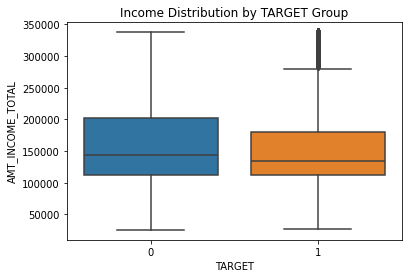

In [471]:

sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=filtered_df)
plt.title('Income Distribution by TARGET Group')
plt.show()

There is a small observable difference in income between the two groups, with those having 
no payment difficulties earning slightly more on average. However, the distributions show considerable overlap, indicating that many individuals within each group earn similar incomes.

In [472]:
grouped_stats = df.groupby('TARGET')[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].describe()
print(grouped_stats)

       AMT_INCOME_TOTAL                                                   \
                  count           mean            std      min       25%   
TARGET                                                                     
0              282686.0  169077.722266  110476.268524  25650.0  112500.0   
1               24825.0  165611.760906  746676.959440  25650.0  112500.0   

                                        AMT_CREDIT                 \
             50%       75%          max      count           mean   
TARGET                                                              
0       148500.0  202500.0   18000090.0   282686.0  602648.282002   
1       135000.0  202500.0  117000000.0    24825.0  557778.527674   

                                                                         \
                  std      min       25%       50%       75%        max   
TARGET                                                                    
0       406845.907710  45000.0  270000.0  517788

In [473]:
filtered_df.groupby('TARGET')['AMT_CREDIT'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,188851.0,539395.012123,321803.052049,45000.0,270000.0,481500.0,755190.0,1615018.5
1,19441.0,518445.771257,292939.096815,45000.0,277969.5,463626.0,675000.0,1609272.0


In [474]:
filtered_df.groupby('TARGET')['AMT_ANNUITY'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,188851.0,25248.193541,11568.968598,1980.0,16195.5,24336.0,32382.0,61654.5
1,19441.0,25575.611465,10990.802462,2844.0,17167.5,24939.0,31923.0,61087.5


In [475]:
# Calculating correlation with 'TARGET'
correlation_with_target = filtered_df[['TARGET','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr()['TARGET']
print(correlation_with_target)


TARGET              1.000000
AMT_INCOME_TOTAL   -0.021463
AMT_CREDIT         -0.019087
AMT_ANNUITY         0.008270
AMT_GOODS_PRICE    -0.031064
Name: TARGET, dtype: float64


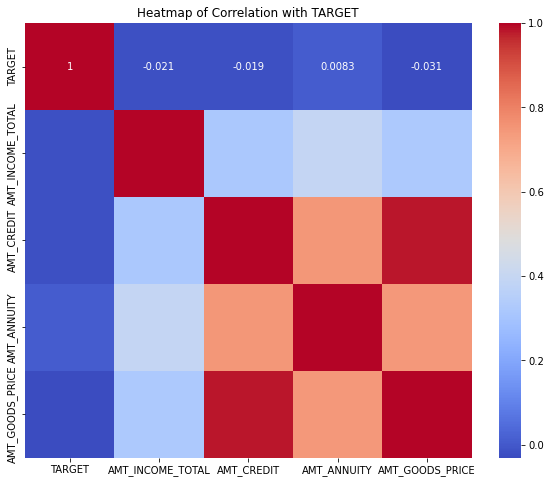

In [476]:
# Calculating correlation matrix
correlation_matrix = filtered_df[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation with TARGET')
plt.show()


In [477]:
target_1_data = filtered_df[filtered_df['TARGET'] == 1]


age_group_counts = target_1_data['agebin'].value_counts().sort_index()
age_group_counts

agebin
20-30    5718
31-40    6854
41-50    4647
51-60    2083
61-70     139
Name: count, dtype: int64

In [405]:
filtered_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE_YEARS,agebin,income_category,YEARS_EMPLOYED
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1,25,20-30,Middle Income,1.745205
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0,45,41-50,Upper Middle Income,3.254795
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0,52,51-60,Low Income,0.616438
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,52,51-60,Lower Middle Income,8.326027
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0,54,51-60,Lower Middle Income,8.323288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,456244,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,1,1,0,1,0,1,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,55,51-60,Upper Middle Income,14.591781
307503,456247,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,-11870,-399,-675.0,-3936,1,1,0,1,0,1,Core staff,1.0,0,0,0,0,0,0,Bank,0,32,31-40,Lower Middle Income,1.093151
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,0,0,0,0,0,0,Services,0,25,20-30,Middle Income,0.646575
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1,32,31-40,Middle Income,13.112329


In [385]:
# Analyzing AGE and EMPLOYMENT  by TARGET group
age_employment_analysis = filtered_df.groupby('TARGET')[['AGE_YEARS', 'YEARS_EMPLOYED']].mean()

# Resetting the index for better plotting
age_employment_analysis_reset = age_employment_analysis.reset_index()



In [383]:
age_employment_analysis

,AGE_YEARS,YEARS_EMPLOYED
TARGET,,
0,39.268942,5.248949
1,37.284502,4.282787


/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


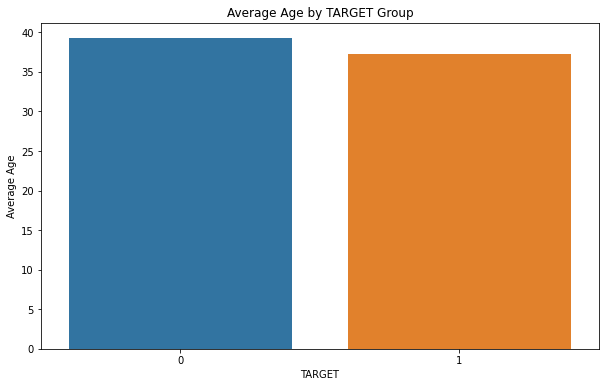

/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


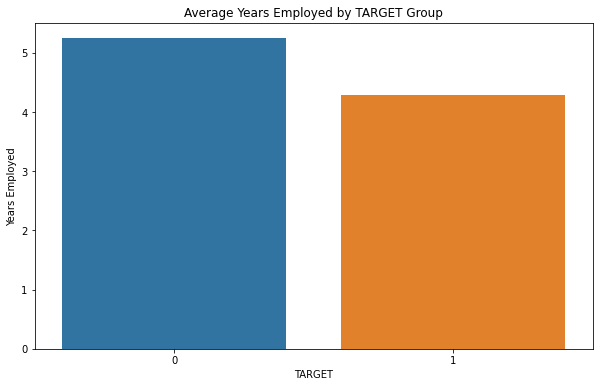

In [234]:
# Plotting Average Age by TARGET Group
plt.figure(figsize=(10, 6))
sns.barplot(x='TARGET', y='AGE_YEARS', data=age_employment_analysis_reset)
plt.title('Average Age by TARGET Group')
plt.ylabel('Average Age')
plt.xlabel('TARGET')
plt.show()

# Plotting Average Years Employed by TARGET Group
plt.figure(figsize=(10, 6))
sns.barplot(x='TARGET', y='YEARS_EMPLOYED', data=age_employment_analysis_reset)
plt.title('Average Years Employed by TARGET Group')
plt.ylabel('Years Employed')
plt.xlabel('TARGET')
plt.show()

In [386]:
defaulters_count = filtered_df[filtered_df['TARGET'] == 1]['NAME_EDUCATION_TYPE'].value_counts().reset_index()
defaulters_count.columns = ['NAME_EDUCATION_TYPE', 'COUNT']

In [388]:
defaulters_count

,NAME_EDUCATION_TYPE,COUNT
0,Secondary / secondary special,15343
1,Higher education,3035
2,Incomplete higher,775
3,Lower secondary,287
4,Academic degree,1


/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


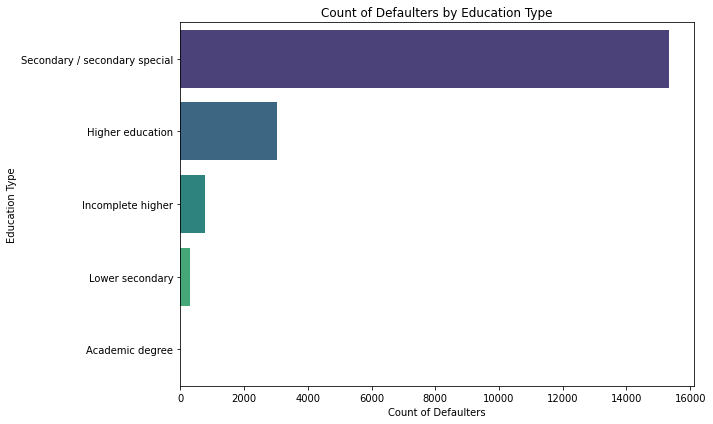

In [389]:
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNT', y='NAME_EDUCATION_TYPE', data=defaulters_count, palette="viridis")
plt.title('Count of Defaulters by Education Type')
plt.xlabel('Count of Defaulters')
plt.ylabel('Education Type')
plt.tight_layout()
plt.show()

In [390]:
defaulters_count = filtered_df[filtered_df['TARGET'] == 1]['CODE_GENDER'].value_counts().reset_index()
defaulters_count.columns = ['CODE_GENDER', 'COUNT'] 

/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


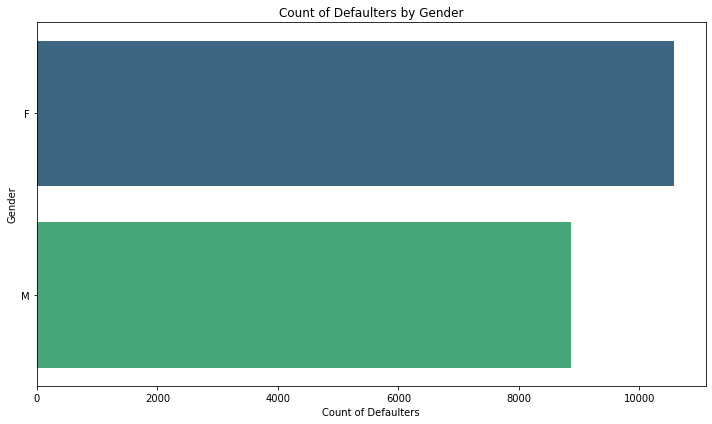

In [396]:
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNT', y='CODE_GENDER', data=defaulters_count, palette="viridis")
plt.title('Count of Defaulters by Gender')
plt.xlabel('Count of Defaulters')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

In [394]:
filtered_df[filtered_df['TARGET'] == 1]['CODE_GENDER'].value_counts()

CODE_GENDER
F    10570
M     8871
Name: count, dtype: int64

In [395]:
filtered_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      129953
M       78336
XNA         3
Name: count, dtype: int64

In [397]:
defaulters_count = filtered_df[filtered_df['TARGET'] == 1]['CNT_CHILDREN'].value_counts().reset_index()
defaulters_count.columns = ['CNT_CHILDREN', 'COUNT'] 

In [400]:
filtered_df[filtered_df['TARGET'] == 1]['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0    12388
1     4934
2     2119
Name: count, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


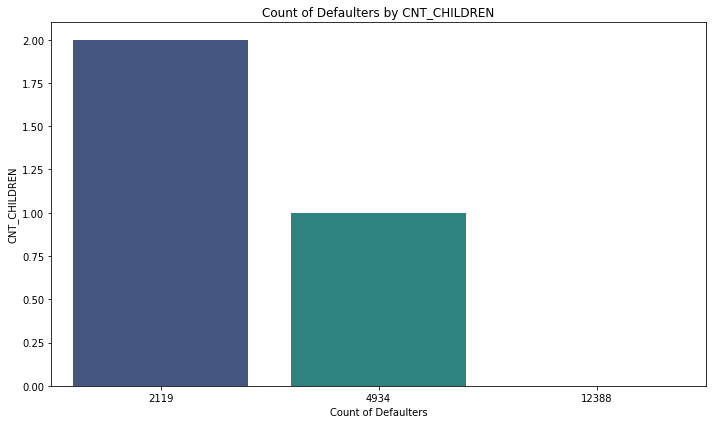

In [398]:
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNT', y='CNT_CHILDREN', data=defaulters_count, palette="viridis")
plt.title('Count of Defaulters by CNT_CHILDREN')
plt.xlabel('Count of Defaulters')
plt.ylabel('CNT_CHILDREN')
plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE'
]


In [478]:
defaulters_proportion = {}

# Calculating the proportion of defaulters in each category
for column in categorical_columns:
    counts = filtered_df.groupby(column)['TARGET'].value_counts(normalize=True).unstack()
    defaulters_proportion[column] = counts[1]  #where TARGET == 1

# Converting the dictionary to a DataFrame for better visualization
defaulters_proportion_df = pd.DataFrame(defaulters_proportion)

print(defaulters_proportion_df)

                 NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
Academic degree                 NaN          NaN           NaN   
Accountants                     NaN          NaN           NaN   
Advertising                     NaN          NaN           NaN   
Agriculture                     NaN          NaN           NaN   
Bank                            NaN          NaN           NaN   
...                             ...          ...           ...   
Widow                           NaN          NaN           NaN   
With parents                    NaN          NaN           NaN   
Working                         NaN          NaN           NaN   
XNA                             NaN          NaN           NaN   
Y                               NaN          NaN      0.081768   

                 FLAG_OWN_REALTY  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
Academic degree              NaN              NaN               NaN   
Accountants                  NaN              NaN               N

In [486]:
import warnings
warnings.filterwarnings('ignore')


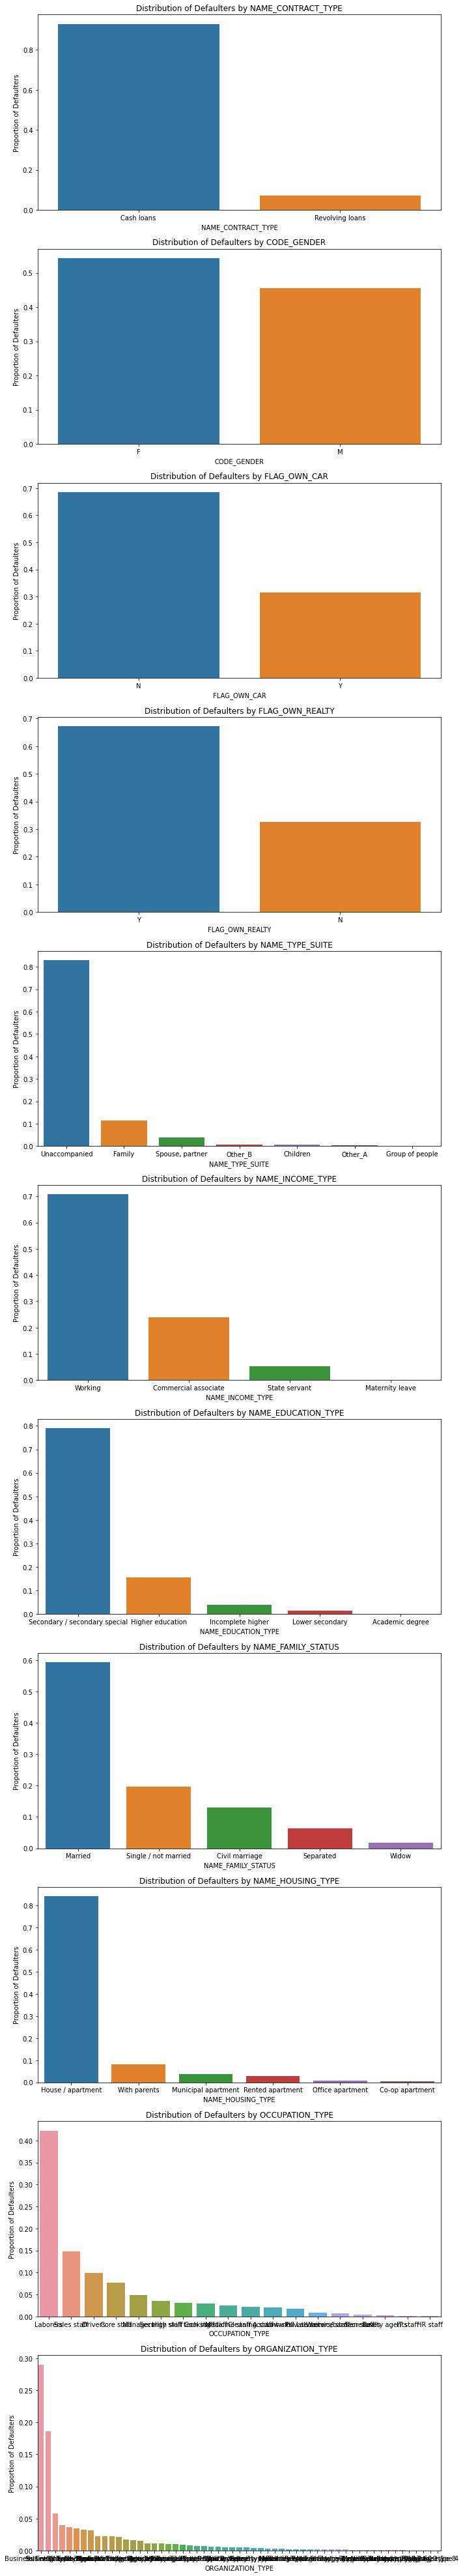

In [489]:
defaulters = filtered_df[filtered_df['TARGET'] == 1]
num_plots = len(categorical_columns)
fig, axes = plt.subplots(num_plots, figsize=(10, 5 * num_plots), constrained_layout=True)

# Check if there's only one category column and not an array of axes
if num_plots == 1:
    axes = [axes]
for i, column in enumerate(categorical_columns):
    # Calculating the frequency of each category within the defaulters
    frequency_df = defaulters[column].value_counts(normalize=True).reset_index()
    frequency_df.columns = [column, 'Proportion'] 
    # Creating the bar plot using seaborn
    sns.barplot(data=frequency_df, x=column, y='Proportion', ax=axes[i])
    axes[i].set_title(f'Distribution of Defaulters by {column}')
    axes[i].set_ylabel('Proportion of Defaulters')
    axes[i].set_xlabel(column)

plt.tight_layout()

plt.show()

# Linear Regression

### NAME_EDUCATION_TYPE and  AMT_INCOME_TOTAL


In [ ]:
#Looking at the relation between eduction and income

In [522]:
selected_columns_df = filtered_df[['NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL']]

selected_columns_df

,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL
0,Secondary / secondary special,202500.0
1,Higher education,270000.0
2,Secondary / secondary special,67500.0
3,Secondary / secondary special,135000.0
4,Secondary / secondary special,121500.0
...,...,...
307500,Higher education,261000.0
307503,Higher education,112500.0
307506,Secondary / secondary special,157500.0
307509,Secondary / secondary special,171000.0


In [524]:
linear_df = pd.get_dummies(selected_columns_df)
linear_df 

,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,202500.0,False,False,False,False,True
1,270000.0,False,True,False,False,False
2,67500.0,False,False,False,False,True
3,135000.0,False,False,False,False,True
4,121500.0,False,False,False,False,True
...,...,...,...,...,...,...
307500,261000.0,False,True,False,False,False
307503,112500.0,False,True,False,False,False
307506,157500.0,False,False,False,False,True
307509,171000.0,False,False,False,False,True


In [525]:
X = linear_df
X = X.drop('AMT_INCOME_TOTAL', axis = 1)

In [531]:
y =linear_df ['AMT_INCOME_TOTAL']

In [527]:
from sklearn.linear_model import LinearRegression

In [533]:
lr = LinearRegression()


In [534]:

lr.fit(X,y)

LinearRegression()

In [535]:
lr.score(X,y)

0.0329995356741668

### NAME_FAMILY_STATUS and AMT_CREDIT

In [536]:
selected_columns_df = filtered_df[['NAME_FAMILY_STATUS', 'AMT_CREDIT']]

selected_columns_df

,NAME_FAMILY_STATUS,AMT_CREDIT
0,Single / not married,406597.5
1,Married,1293502.5
2,Single / not married,135000.0
3,Civil marriage,312682.5
4,Single / not married,513000.0
...,...,...
307500,Married,1303812.0
307503,Single / not married,345510.0
307506,Separated,254700.0
307509,Married,370107.0


In [537]:
linear_df = pd.get_dummies(selected_columns_df)
linear_df 

,AMT_CREDIT,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow
0,406597.5,False,False,False,True,False,False
1,1293502.5,False,True,False,False,False,False
2,135000.0,False,False,False,True,False,False
3,312682.5,True,False,False,False,False,False
4,513000.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...
307500,1303812.0,False,True,False,False,False,False
307503,345510.0,False,False,False,True,False,False
307506,254700.0,False,False,True,False,False,False
307509,370107.0,False,True,False,False,False,False


In [538]:
X = linear_df
X = X.drop('AMT_CREDIT', axis = 1)

In [539]:
y =linear_df ['AMT_CREDIT']

In [540]:
lr.fit(X,y)

LinearRegression()

In [541]:
lr.score(X,y)

0.018594665857028847

# logistic Regression

In [490]:
filtered_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE_YEARS,agebin,income_category
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1,25,20-30,Middle Income
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0,45,41-50,Upper Middle Income
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0,52,51-60,Low Income
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,52,51-60,Lower Middle Income
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0,54,51-60,Lower Middle Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,456244,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,1,1,0,1,0,1,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,55,51-60,Upper Middle Income
307503,456247,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,-11870,-399,-675.0,-3936,1,1,0,1,0,1,Core staff,1.0,0,0,0,0,0,0,Bank,0,32,31-40,Lower Middle Income
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,0,0,0,0,0,0,Services,0,25,20-30,Middle Income
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1,32,31-40,Middle Income


In [491]:
filtered_df.groupby(['TARGET']).count()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE_YEARS,agebin,income_category
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851,188851
1,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441,19441


array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>],
       [<Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>],
       [<Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REG_REGION_NOT_LIVE_REGION'}>,
        <Axes: title={'center': 'REG_REGION_NOT_WORK_REGION'}>,
    

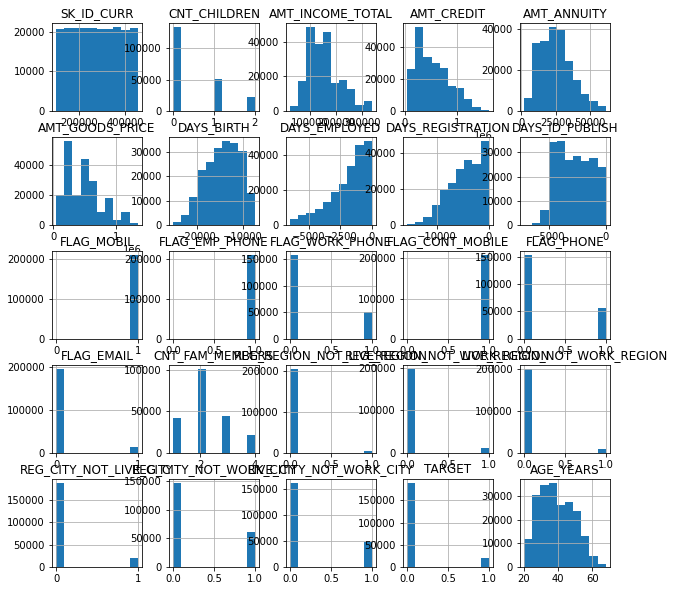

In [492]:
filtered_df.hist(figsize=(10,10))

In [493]:
log_df = filtered_df.copy()

In [494]:
log_df 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AGE_YEARS,agebin,income_category
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1,25,20-30,Middle Income
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0,45,41-50,Upper Middle Income
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0,52,51-60,Low Income
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,52,51-60,Lower Middle Income
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0,54,51-60,Lower Middle Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,456244,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,1,1,0,1,0,1,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,55,51-60,Upper Middle Income
307503,456247,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,-11870,-399,-675.0,-3936,1,1,0,1,0,1,Core staff,1.0,0,0,0,0,0,0,Bank,0,32,31-40,Lower Middle Income
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,0,0,0,0,0,0,Services,0,25,20-30,Middle Income
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1,32,31-40,Middle Income


In [496]:
columns_to_drop = ['AGE_YEARS', 'agebin', 'income_category', 'SK_ID_CURR']
log_df  = log_df.drop(columns=columns_to_drop)

In [497]:
log_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,1,1,0,1,0,1,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
307503,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,-11870,-399,-675.0,-3936,1,1,0,1,0,1,Core staff,1.0,0,0,0,0,0,0,Bank,0
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,0,0,0,0,0,0,Services,0
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,0,0,0,1,1,0,Business Entity Type 1,1


In [498]:
#Storing the categorical column in cate_df
cate_df =log_df.select_dtypes(object)


In [499]:
cate_df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [500]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [501]:
# categorical columns
categorical_features = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE'
]


In [502]:
# Creating the OneHotEncoder
one_hot = OneHotEncoder()

In [503]:
#  ColumnTransformer to apply one-hot encoding to the categorical columns
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough",
    sparse_threshold=0
)

In [504]:
transformed_log_df = transformer.fit_transform(log_df)

In [505]:

one_hot_features = transformer.named_transformers_['one_hot'].get_feature_names_out(categorical_features)

In [506]:
# Combining  with the rest of the column names, which were not transformed
remaining_columns = [col for col in log_df.columns if col not in categorical_features]
all_columns = list(one_hot_features) + remaining_columns


In [507]:
# Creating a new DataFrame with the transformed data and new 
transformed_log_df = pd.DataFrame(transformed_log_df, columns=all_columns, index=log_df.index)

In [508]:
transformed_log_df 

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0

In [509]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [510]:
X = transformed_log_df 

In [511]:
X= X.drop(['TARGET'],axis=1)

In [512]:
y = transformed_log_df['TARGET']

In [513]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [514]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [515]:
# Evaluating the model on the training set
print("Training set score:", lr.score(X_train, y_train))
train_pred = lr.predict(X_train)
print("Training set confusion matrix:")
print(pd.DataFrame(confusion_matrix(y_train, train_pred), index=['actual:yes', 'actual:no'], columns=['pred:yes', 'pred:no']))


Training set score: 0.9059559408521028
Training set confusion matrix:
            pred:yes  pred:no
actual:yes    132092        0
actual:no      13712        0


In [517]:
# Evaluating the model on the testing set
print("Testing set score:", lr.score(X_test, y_test))
test_pred = lr.predict(X_test)
print("Testing set confusion matrix:")
print(pd.DataFrame(confusion_matrix(y_test, test_pred), index=['actual:yes', 'actual:no'], columns=['pred:yes', 'pred:no']))


Testing set score: 0.9083183971322494
Testing set confusion matrix:
            pred:yes  pred:no
actual:yes     56759        0
actual:no       5729        0


In [518]:
lr_balanced = LogisticRegression(class_weight='balanced')
lr_balanced.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [519]:
# Evaluating the balanced model
print("Balanced model training set score:", lr_balanced.score(X_train, y_train))
balanced_train_pred = lr_balanced.predict(X_train)
print("Balanced model training set confusion matrix:")
print(pd.DataFrame(confusion_matrix(y_train, balanced_train_pred), index=['actual:yes', 'actual:no'], columns=['pred:yes', 'pred:no']))


Balanced model training set score: 0.6036802831198047
Balanced model training set confusion matrix:
            pred:yes  pred:no
actual:yes     80626    51466
actual:no       6319     7393


In [520]:
print("Balanced model testing set score:", lr_balanced.score(X_test, y_test))
balanced_test_pred = lr_balanced.predict(X_test)
print("Balanced model testing set confusion matrix:")
print(pd.DataFrame(confusion_matrix(y_test, balanced_test_pred), index=['actual:yes', 'actual:no'], columns=['pred:yes', 'pred:no']))

Balanced model testing set score: 0.6023556522852388
Balanced model testing set confusion matrix:
            pred:yes  pred:no
actual:yes     34520    22239
actual:no       2609     3120
